### 코드 정리
1.   ID, ip_src, ip_dst는 범주형이거나 ip번호여서 이 부분을 모델이 직접 사용하지 않는게 좋을 것 같다고 생각합니다.

In [186]:
import pandas as pd
train=pd.read_csv('train.csv')

In [187]:
train.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign


In [188]:
train['attack_type'].value_counts()

,count
attack_type,
Benign,8791
Hulk,1719
Port_Scanning,793
DDoS,471
FTP_Brute_Force,47
GoldenEye,41
Slow_HTTP,34
SSH_Brute_Force,30
Botnet,27


In [189]:
train.shape

(11999, 22)

In [190]:
train=train.drop(['ID','ip_src','ip_dst'], axis=1)

In [191]:
train.isnull().sum()

,0
port_src,3374
port_dst,2287
protocol,0
duration,1074
pkt_count_fwd,0
pkt_count_bwd,0
rate_fwd_pkts,1171
rate_bwd_pkts,1687
rate_fwd_bytes,0
rate_bwd_bytes,0


결측치를 보았을때에 port_src의 경우에는 결측치가 11999 중에서 3374로 약 28%정도이며

port_src는 송신 측 포트번호로 저희가 하는 주제는 사이버 공격 유형을 예측하는 것이어서 없어도 괜찮을 것 같습니다.

**-> port_src는 제거하는게 좋을 것 같다고 생각합니다.**



In [192]:
train=train.drop(['port_src'], axis=1)

In [193]:
train.head()

,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,rate_bwd_pkts,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,55.0,UDP,0.000231,2,2,8656.974200,8656.974200,259709.226006,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,91.0,TCP,0.000000,0,1,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,83.0,TCP,0.606002,11,5,18.151760,8.250800,1727.717487,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,NaN,TCP,1.003829,6,6,5.977114,5.977114,324.756507,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,451.0,TCP,181.195271,62,89,NaN,0.491183,6.573019,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign


port_dist의 경우에는 결측치가 2287개가 있다. port_dist의 히스토그램을 보면 0~500사이에 많은 데이터가 분포 되어 있는 것을 알 수 있다. 왜도는 약 2.4정도로 오른쪽으로 꼬리가 길다는 것을 알 수 있다.

**-> port_dist는 결측치를 중앙값으로 대체한다.**

2.4367514813258206


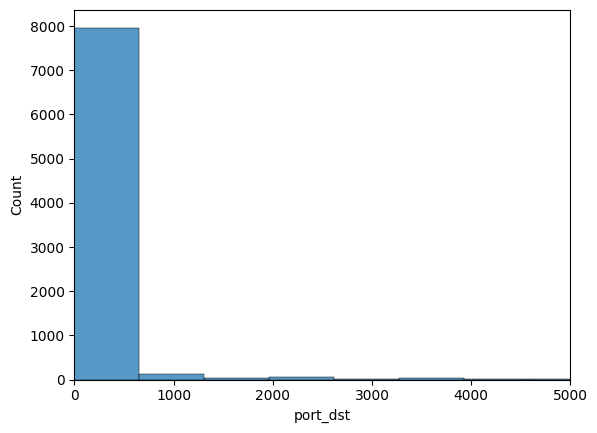

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
print(train['port_dst'].skew())
sns.histplot(train['port_dst'], bins=100, kde=False)
plt.xlim(0, 5000)
plt.show()

In [195]:
train['port_dst'].fillna(train['port_dst'].median())

,port_dst
0,55.0
1,91.0
2,83.0
3,83.0
4,451.0
...,...
11994,49.0
11995,54.0
11996,83.0
11997,83.0


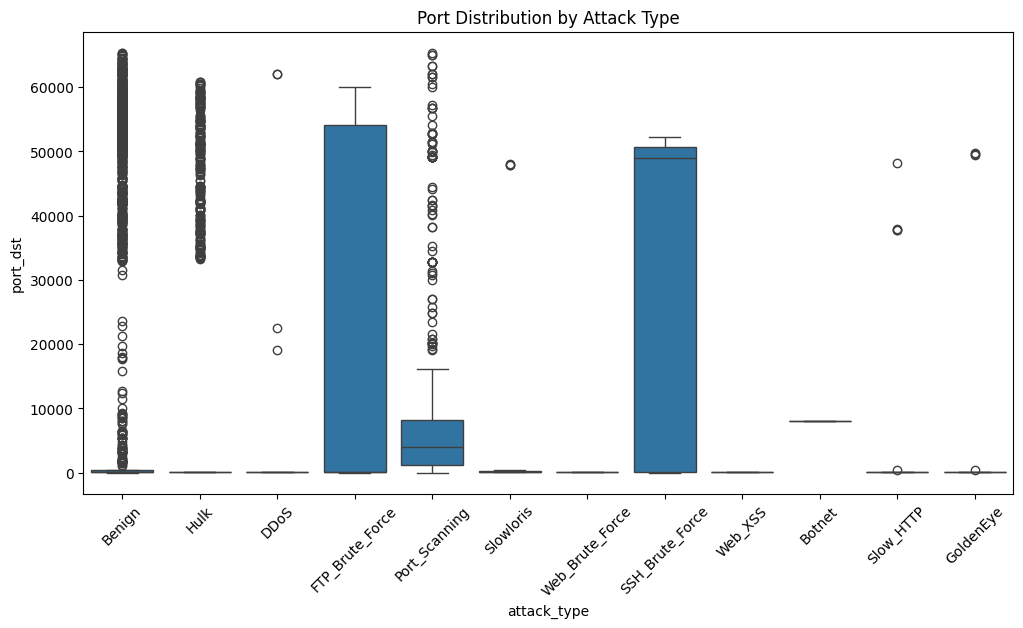

In [196]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='port_dst', data=train)
plt.xticks(rotation=45)
plt.title("Port Distribution by Attack Type")
plt.show()

duration의 경우에는 히스토그램과 왜도를 보게 되면 왜도가 10이상으로 로그변환을 하는 것이 좋을 것 같다. 그래서 결측치를 처리할때에 평균보다는 중앙값을 이용하는 것이 좋을 것 같다.

**-> duration : 결측치는 중앙값으로 + 로그변환**

51.982621492927706


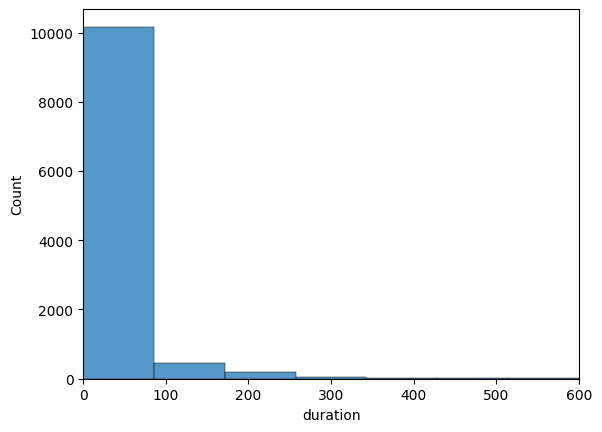

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
print(train['duration'].skew())
sns.histplot(train['duration'], bins=100, kde=False)
plt.xlim(0, 600)
plt.show()

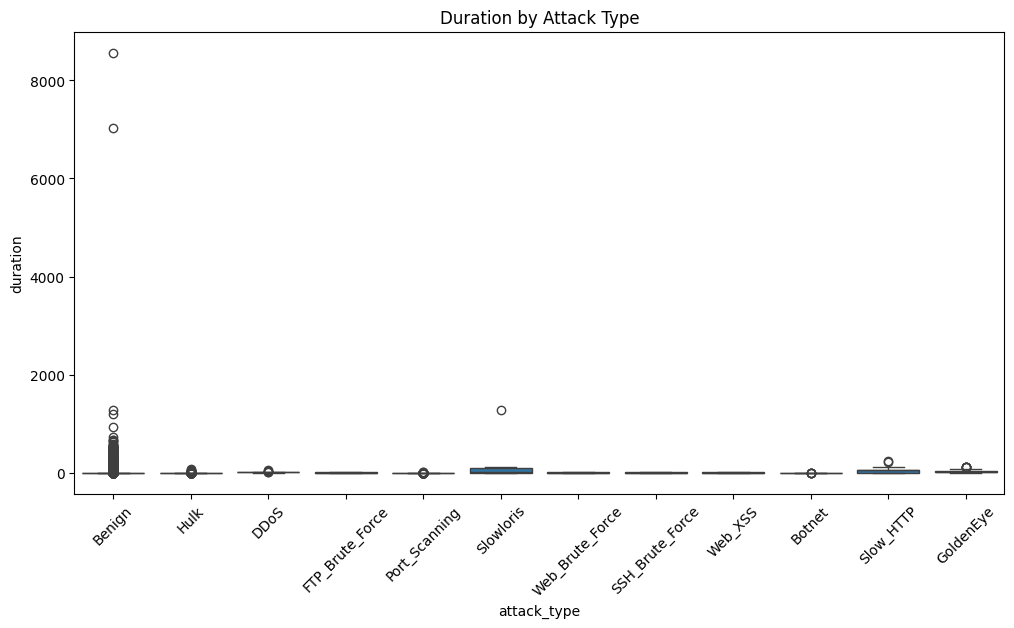

In [198]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='duration', data=train)
plt.xticks(rotation=45)
plt.title("Duration by Attack Type")
plt.show()

In [199]:
#duration에서 결측치를 중앙값으로 처리
train['duration'].fillna(train['duration'].median())

,duration
0,0.000231
1,0.000000
2,0.606002
3,1.003829
4,181.195271
...,...
11994,0.023636
11995,0.061452
11996,0.049973
11997,0.047832


In [200]:
import numpy as np
train['duration']=np.log1p(train['duration'])

2.0761250542164933


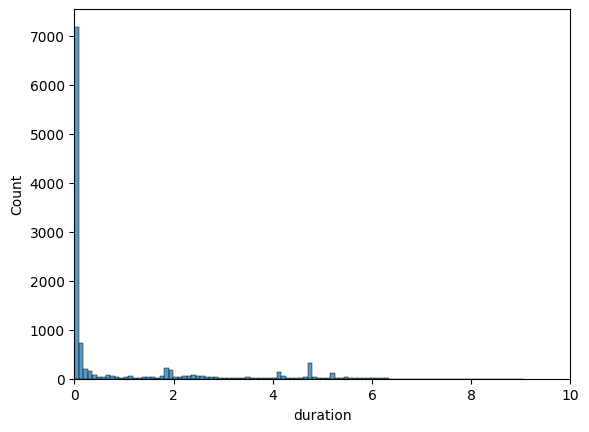

In [201]:
#결측치 처리 + 로그변환 이후
import matplotlib.pyplot as plt
import seaborn as sns
print(train['duration'].skew())
sns.histplot(train['duration'], bins=100, kde=False)
plt.xlim(0, 10)
plt.show()

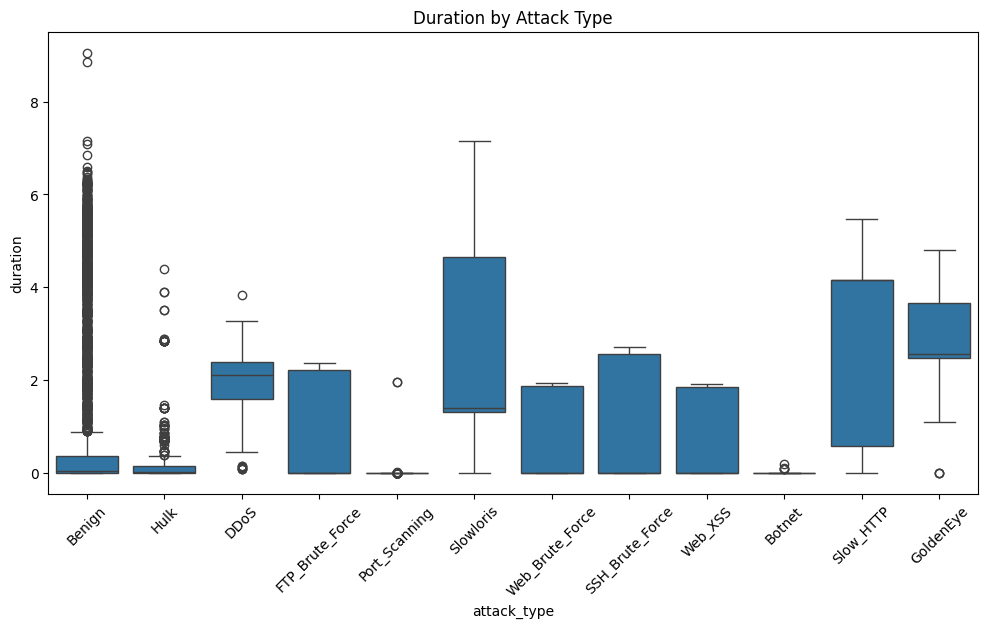

In [202]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='duration', data=train)
plt.xticks(rotation=45)
plt.title("Duration by Attack Type")
plt.show()

pkt_count_fwd의 경우에는 boxplot과 왜도를 보게 되면 왜도가 10이상으로 로그변환을 하는 것이 좋을 것 같다.

**-> pkt_count_fwd : 로그변환**

In [203]:
train['pkt_count_fwd'].describe()

,pkt_count_fwd
count,11999.000000
mean,16.019168
std,1125.156847
min,0.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,123229.000000


109.46989208251915


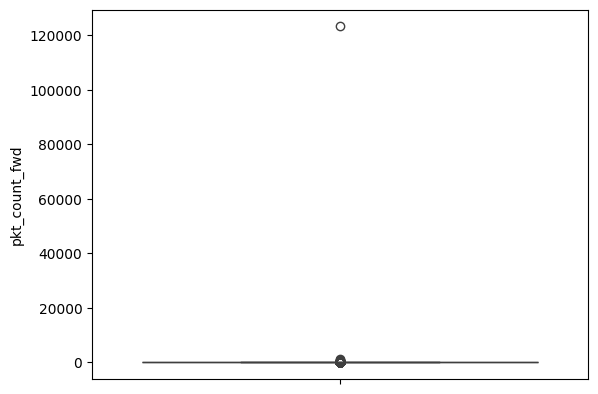

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
print(train['pkt_count_fwd'].skew())
sns.boxplot(train['pkt_count_fwd'])
plt.show()

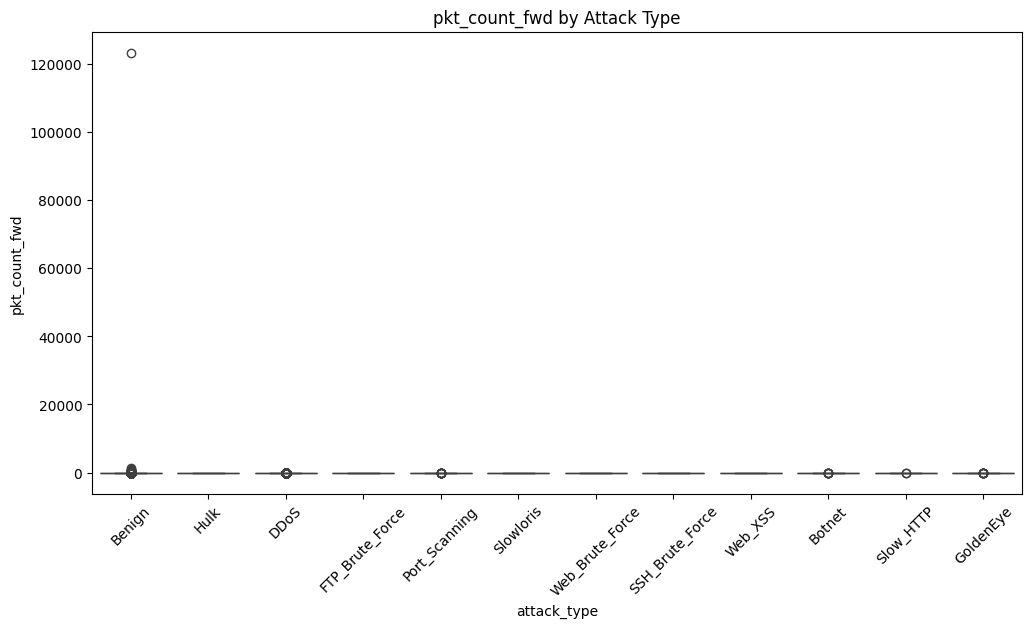

In [205]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='pkt_count_fwd', data=train)
plt.xticks(rotation=45)
plt.title("pkt_count_fwd by Attack Type")
plt.show()

In [206]:
train['pkt_count_fwd']=np.log1p(train['pkt_count_fwd'])

1.1437539407099746


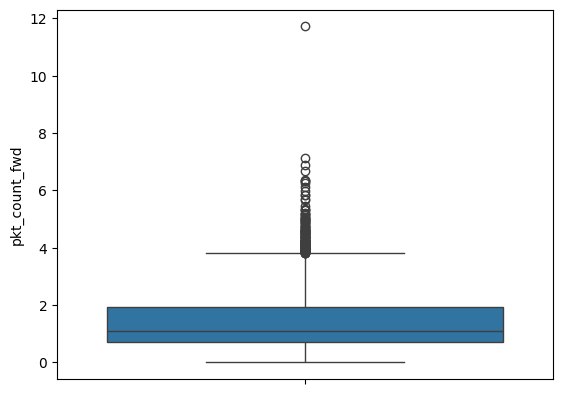

In [207]:
# 로그변환 이후
print(train['pkt_count_fwd'].skew())
sns.boxplot(train['pkt_count_fwd'])
plt.show()

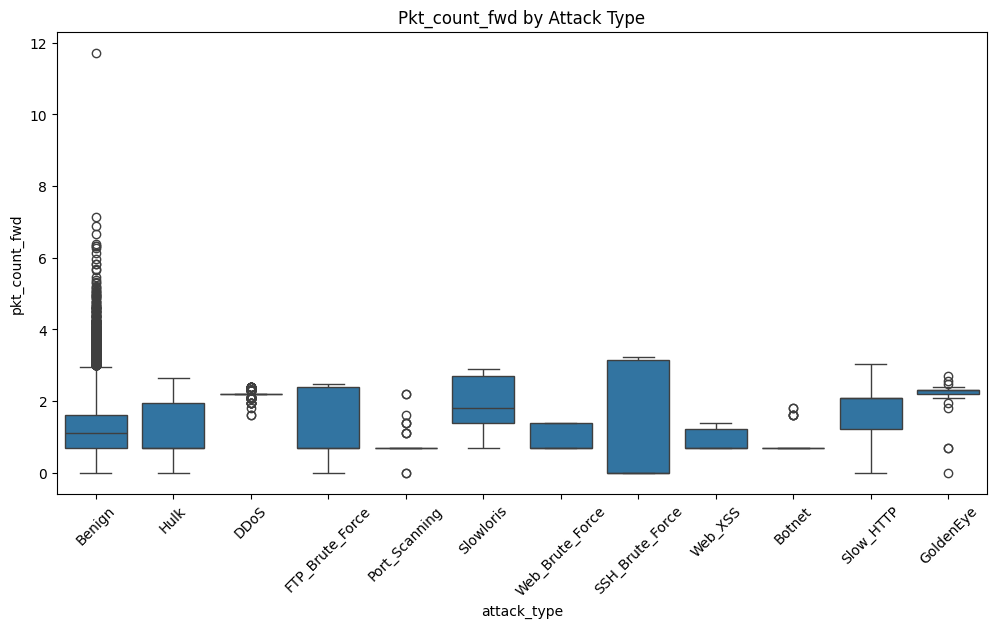

In [208]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='pkt_count_fwd', data=train)
plt.xticks(rotation=45)
plt.title("Pkt_count_fwd by Attack Type")
plt.show()

pkt_count_bwd의 경우에는 boxplot과 왜도를 보게 되면 왜도가 10이상으로 로그변환을 하는 것이 좋을 것 같다.

**-> pkt_count_bwd : 로그변환**

109.4651942237973


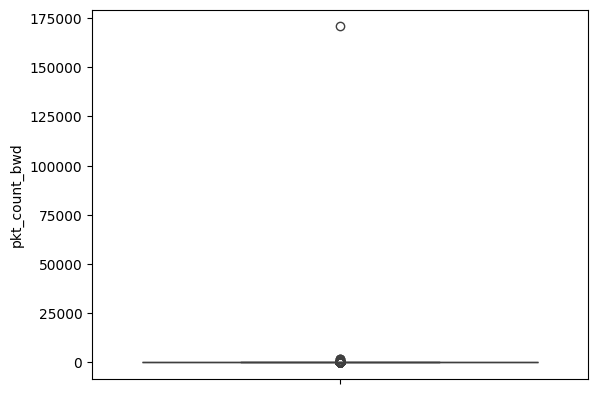

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
print(train['pkt_count_bwd'].skew())
sns.boxplot(train['pkt_count_bwd'])
plt.show()

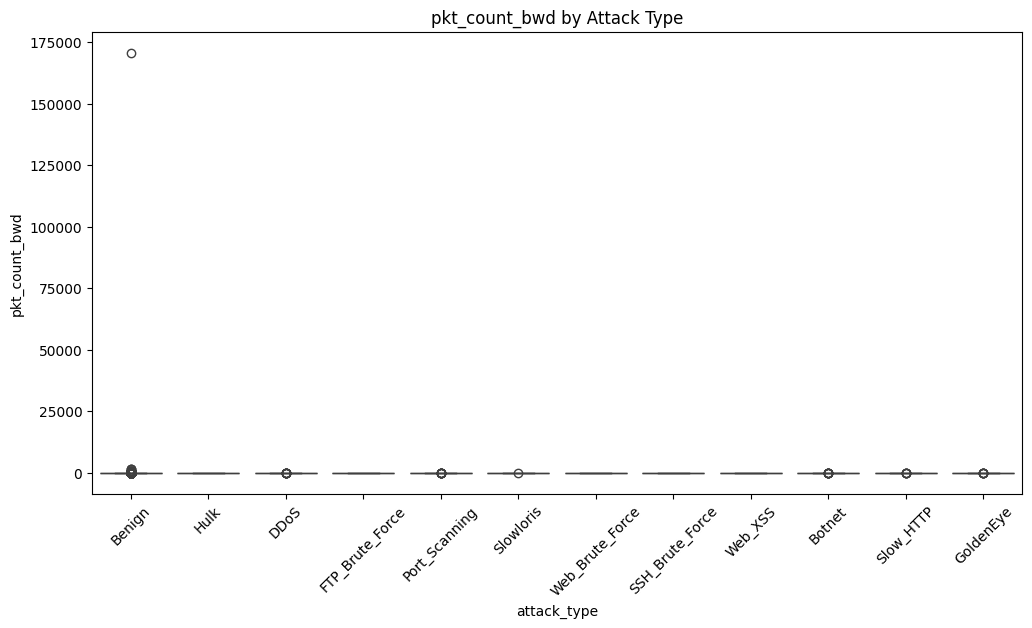

In [210]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='pkt_count_bwd', data=train)
plt.xticks(rotation=45)
plt.title("pkt_count_bwd by Attack Type")
plt.show()

In [211]:
train['pkt_count_bwd']=np.log1p(train['pkt_count_bwd'])

1.306808770337218


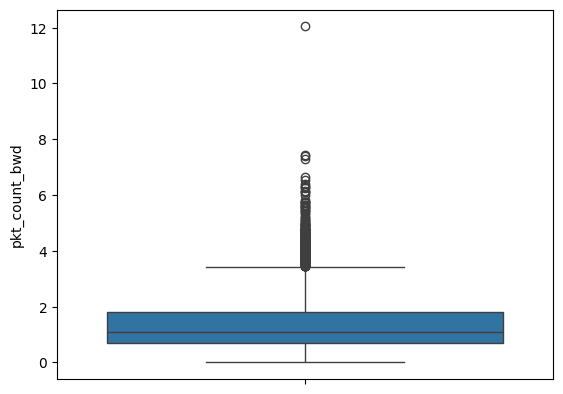

In [212]:
# 로그변환 이후
print(train['pkt_count_bwd'].skew())
sns.boxplot(train['pkt_count_bwd'])
plt.show()

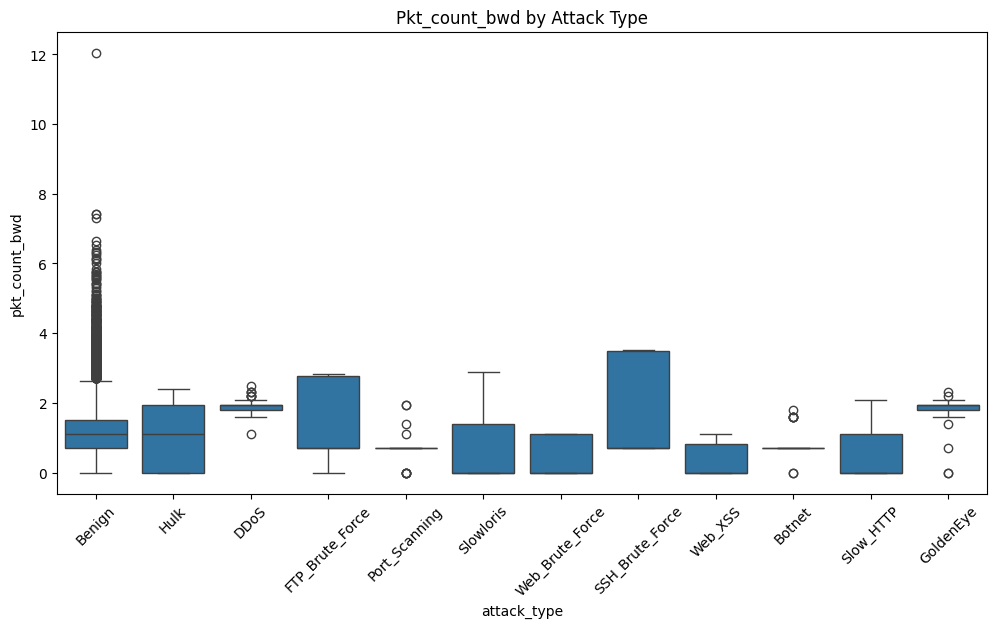

In [213]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='pkt_count_bwd', data=train)
plt.xticks(rotation=45)
plt.title("Pkt_count_bwd by Attack Type")
plt.show()

rate_fwd_pkts의 경우에는 히스토그램과 왜도를 보게 되면 왜도가 10이상으로 로그변환을 하는 것이 좋을 것 같다. 그래서 결측치를 처리할때에 평균보다는 중앙값을 이용하는 것이 좋을 것 같다.

**-> rate_fwd_pkts : 결측치는 중앙값으로 + 로그변환**

16.06879066628271


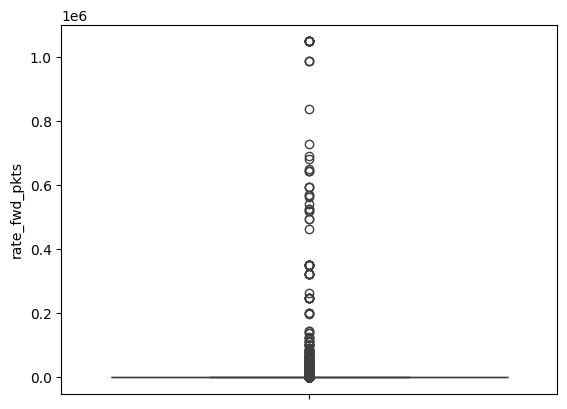

In [214]:
print(train['rate_fwd_pkts'].skew())
sns.boxplot(train['rate_fwd_pkts'])
plt.show()

In [215]:
#duration에서 결측치를 중앙값으로 처리
train['rate_fwd_pkts'].fillna(train['rate_fwd_pkts'].median())

,rate_fwd_pkts
0,8656.974200
1,0.000000
2,18.151760
3,5.977114
4,7.683389
...,...
11994,42.308586
11995,16.272824
11996,40.021603
11997,41.813002


In [216]:
train['rate_fwd_pkts']=np.log1p(train['rate_fwd_pkts'])

0.8692386391149648


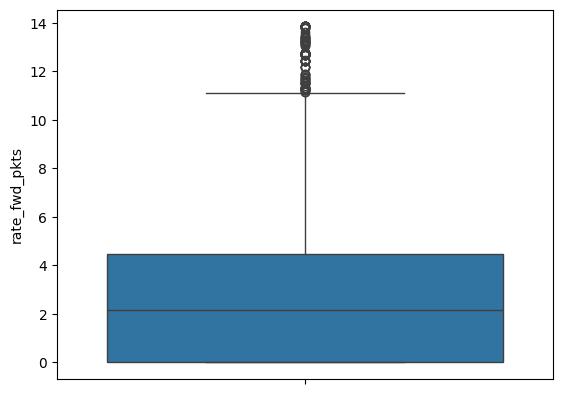

In [217]:
#결측치 처리+로그변환 이후
print(train['rate_fwd_pkts'].skew())
sns.boxplot(train['rate_fwd_pkts'])
plt.show()

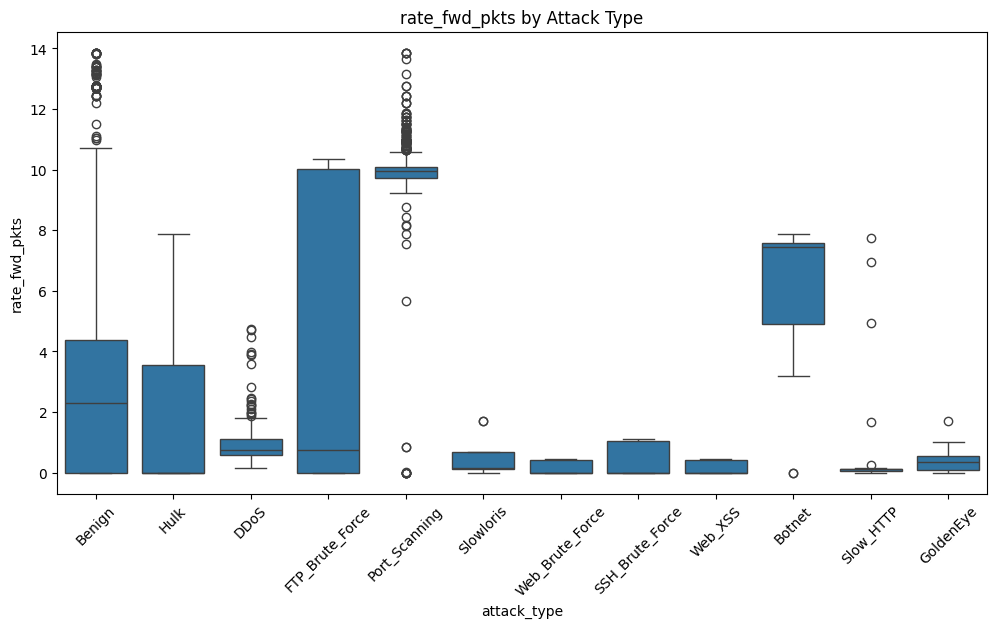

In [218]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='rate_fwd_pkts', data=train)
plt.xticks(rotation=45)
plt.title("rate_fwd_pkts by Attack Type")
plt.show()

rate_bwd_pkts의 경우에는 히스토그램과 왜도를 보게 되면 왜도가 10이상으로 로그변환을 하는 것이 좋을 것 같다. 그래서 결측치를 처리할때에 평균보다는 중앙값을 이용하는 것이 좋을 것 같다.

**-> rate_bwd_pkts : 결측치는 중앙값으로 + 로그변환**

25.09097196663452


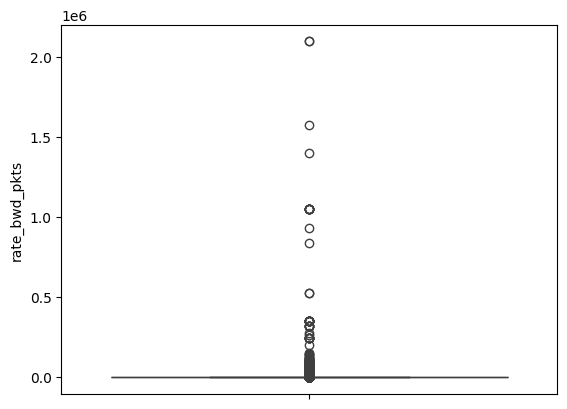

In [219]:
print(train['rate_bwd_pkts'].skew())
sns.boxplot(train['rate_bwd_pkts'])
plt.show()

In [220]:
#rate_bwd_pkts에서 결측치를 중앙값으로 처리
train['rate_bwd_pkts'].fillna(train['rate_fwd_pkts'].median())

,rate_bwd_pkts
0,8656.974200
1,0.000000
2,8.250800
3,5.977114
4,0.491183
...,...
11994,42.308586
11995,16.272824
11996,40.021603
11997,41.813002


In [221]:
train['rate_bwd_pkts']=np.log1p(train['rate_bwd_pkts'])

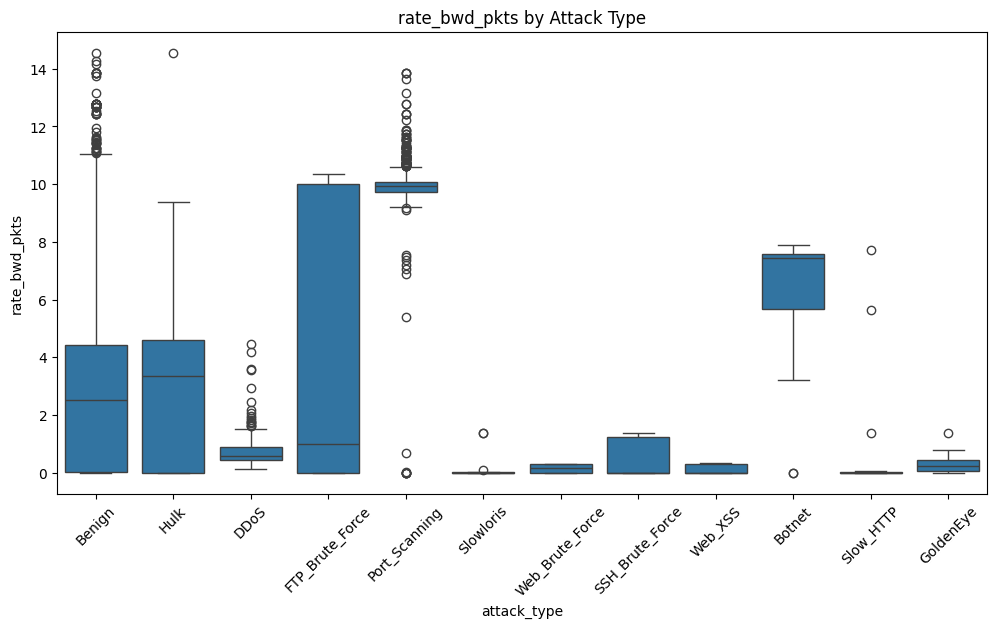

In [222]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='rate_bwd_pkts', data=train)
plt.xticks(rotation=45)
plt.title("rate_bwd_pkts by Attack Type")
plt.show()

payload_fwd_mean는 그래프로 시각화를 하였을때, 왜도도 높지 않다. 결측치가 있는데, 값들이 넓게 펼쳐져 있으므로 중앙값으로 사용하는게 좋을 것 같다.

**->payload_fwd_mean: 결측치는 중앙값으로**

2.0789345831282606


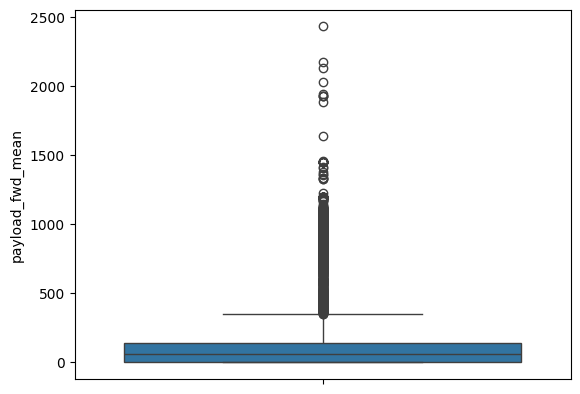

In [223]:
print(train['payload_fwd_mean'].skew())
sns.boxplot(train['payload_fwd_mean'])
plt.show()

In [224]:
train['payload_fwd_mean'].describe()

,payload_fwd_mean
count,10214.000000
mean,183.602231
std,312.584458
min,0.000000
25%,0.000000
50%,61.500000
75%,141.000000
max,2433.333333


In [225]:
#payload_fwd_mean에서 결측치를 중앙값으로 처리
train['payload_fwd_mean'].fillna(train['payload_fwd_mean'].median())

,payload_fwd_mean
0,81.000000
1,0.000000
2,790.125000
3,993.416667
4,61.500000
...,...
11994,91.000000
11995,61.000000
11996,66.000000
11997,103.500000


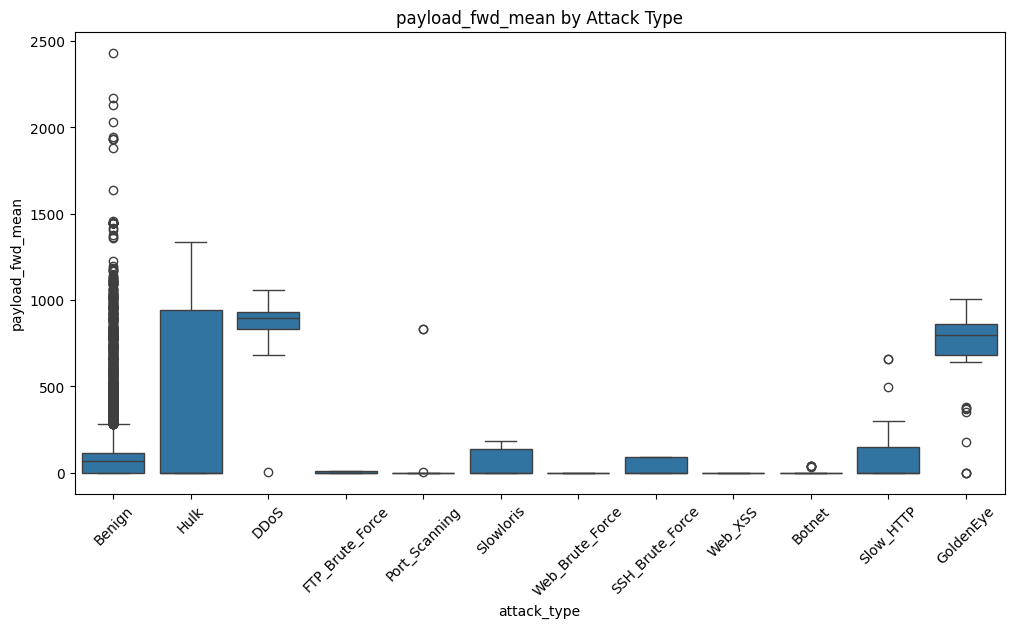

In [226]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='payload_fwd_mean', data=train)
plt.xticks(rotation=45)
plt.title("payload_fwd_mean by Attack Type")
plt.show()

payload_bwd_mean는 그래프로 시각화를 하였을때, 왜도도 높지 않다. 결측치가 있는데, 값들이 넓게 펼쳐져 있으므로 중앙값으로 사용하는게 좋을 것 같다.

**->payload_bwd_mean: 결측치는 중앙값으로**

2.0789345831282606


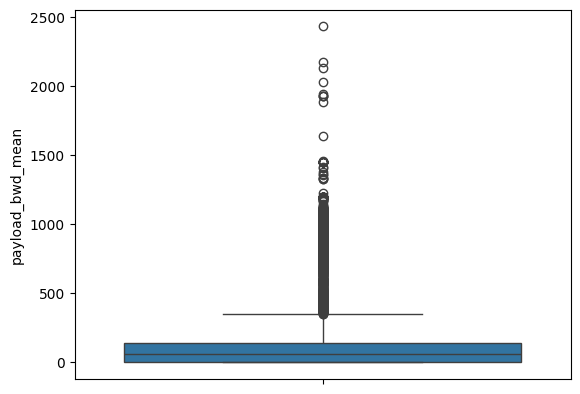

In [227]:
print(train['payload_bwd_mean'].skew())
sns.boxplot(train['payload_bwd_mean'])
plt.show()

In [228]:
train['payload_bwd_mean'].describe()

,payload_bwd_mean
count,10214.000000
mean,183.602231
std,312.584458
min,0.000000
25%,0.000000
50%,61.500000
75%,141.000000
max,2433.333333


In [229]:
#payload_bwd_mean에서 결측치를 중앙값으로 처리
train['payload_bwd_mean'].fillna(train['payload_bwd_mean'].median())

,payload_bwd_mean
0,81.000000
1,0.000000
2,790.125000
3,993.416667
4,61.500000
...,...
11994,91.000000
11995,61.000000
11996,66.000000
11997,103.500000


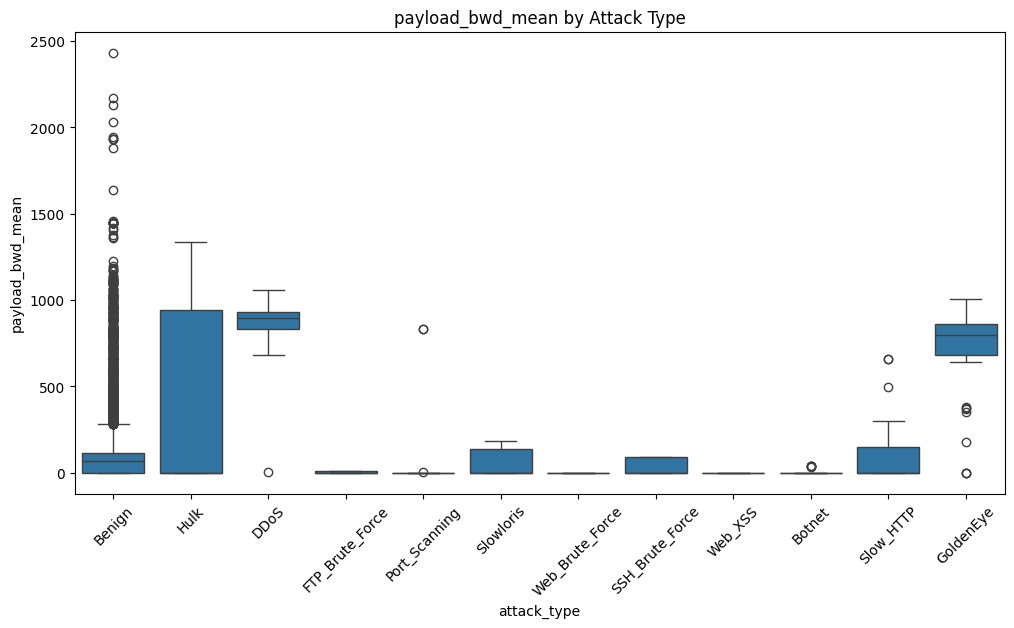

In [230]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='payload_bwd_mean', data=train)
plt.xticks(rotation=45)
plt.title("payload_bwd_mean by Attack Type")
plt.show()

tcp_win_fwd_init는 그래프로 시각화를 하였을때, 왜도도 높지 않았다. 하지만, 50% 이상이 0으로 이루어져 있고, 최댓값이 65535여서 로그변환을 하는게 좋을 것 같다.

**->tcp_win_fwd_init: 로그변환**

2.10027058583249


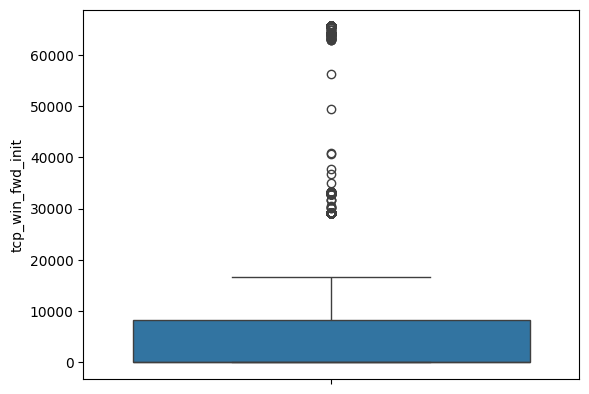

In [231]:
print(train['tcp_win_fwd_init'].skew())
sns.boxplot(train['tcp_win_fwd_init'])
plt.show()

In [232]:
train['tcp_win_fwd_init'].describe()

,tcp_win_fwd_init
count,11999.000000
mean,8464.435870
std,15043.771463
min,0.000000
25%,0.000000
50%,0.000000
75%,8192.000000
max,65535.000000


In [233]:
train['tcp_win_fwd_init']=np.log1p(train['tcp_win_fwd_init'])

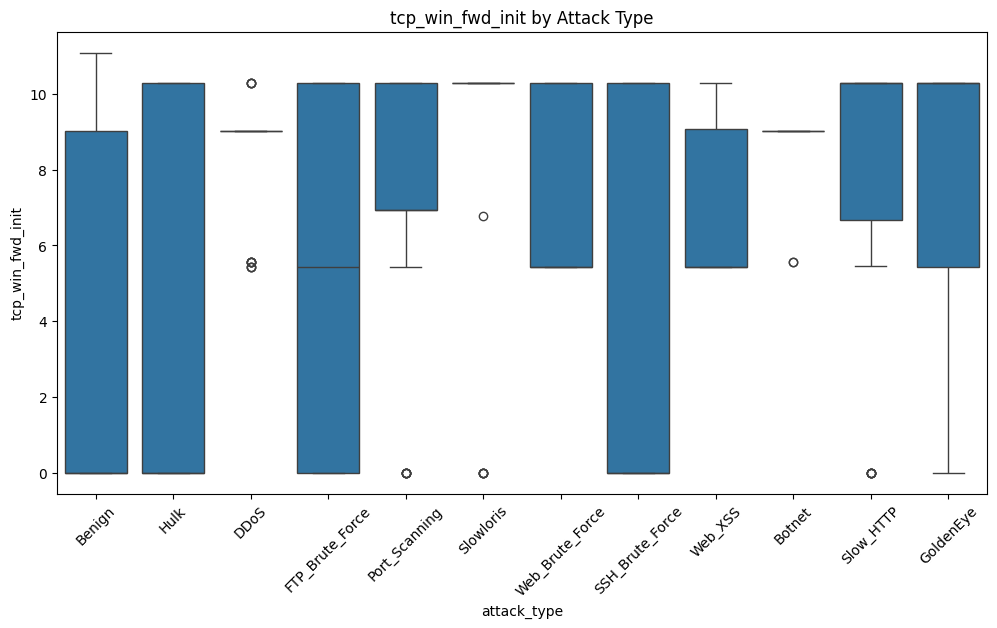

In [234]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='tcp_win_fwd_init', data=train)
plt.xticks(rotation=45)
plt.title("tcp_win_fwd_init by Attack Type")
plt.show()

tcp_win_bwd_init는 그래프로 시각화를 하였을때, 왜도도 높지 않았다. 하지만, 50% 이상이 0으로 이루어져 있고, 최댓값이 65535여서 로그변환을 하는게 좋을 것 같다.

**->tcp_win_bwd_init: 로그변환**

1.3860472205838854


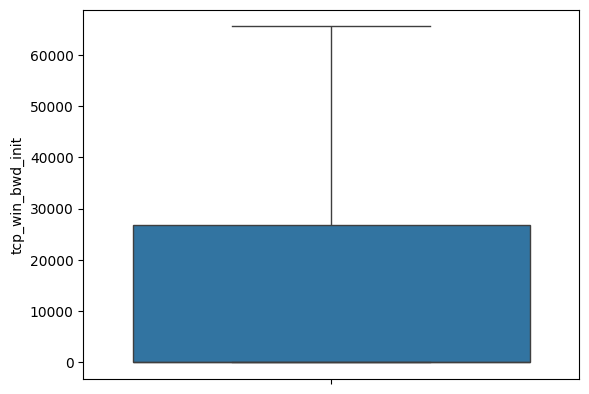

In [235]:
print(train['tcp_win_bwd_init'].skew())
sns.boxplot(train['tcp_win_bwd_init'])
plt.show()

In [236]:
train['tcp_win_bwd_init'].describe()

,tcp_win_bwd_init
count,11999.000000
mean,8691.062839
std,14180.141107
min,0.000000
25%,0.000000
50%,0.000000
75%,26847.000000
max,65535.000000


In [237]:
train['tcp_win_bwd_init']=np.log1p(train['tcp_win_bwd_init'])

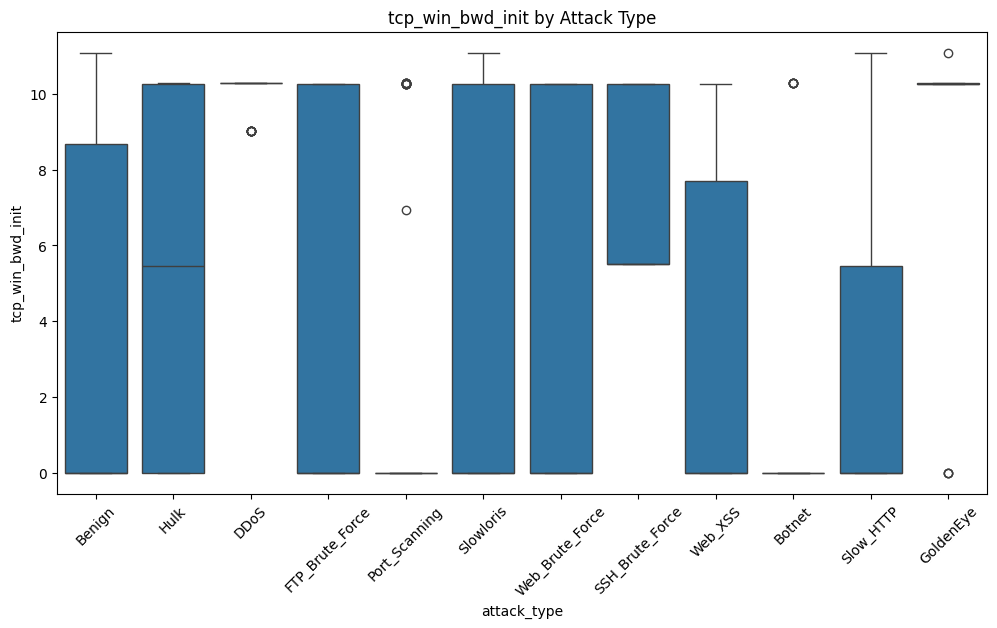

In [238]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='tcp_win_bwd_init', data=train)
plt.xticks(rotation=45)
plt.title("tcp_win_bwd_init by Attack Type")
plt.show()

tcp_syn_count는 결측치가 없다. 그래프를 시각화하였을때 왜도가 작고, 값이 넓게 펼쳐져 있지 않아서 그대로 사용해도 괜찮을 것 같다.

**->tcp_syn_count : 그대로 사용**

1.2675425048521698


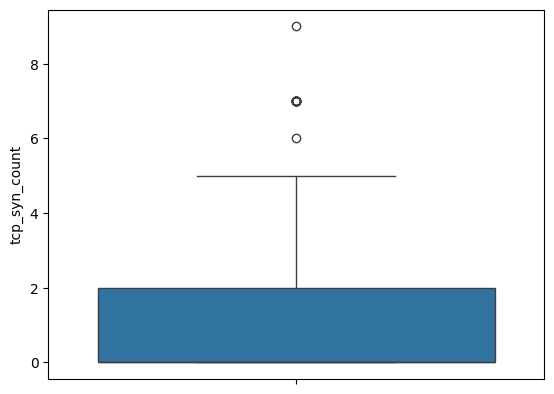

In [239]:
print(train['tcp_syn_count'].skew())
sns.boxplot(train['tcp_syn_count'])
plt.show()

In [240]:
train['tcp_syn_count'].describe()

,tcp_syn_count
count,11999.000000
mean,0.713976
std,1.010957
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,9.000000


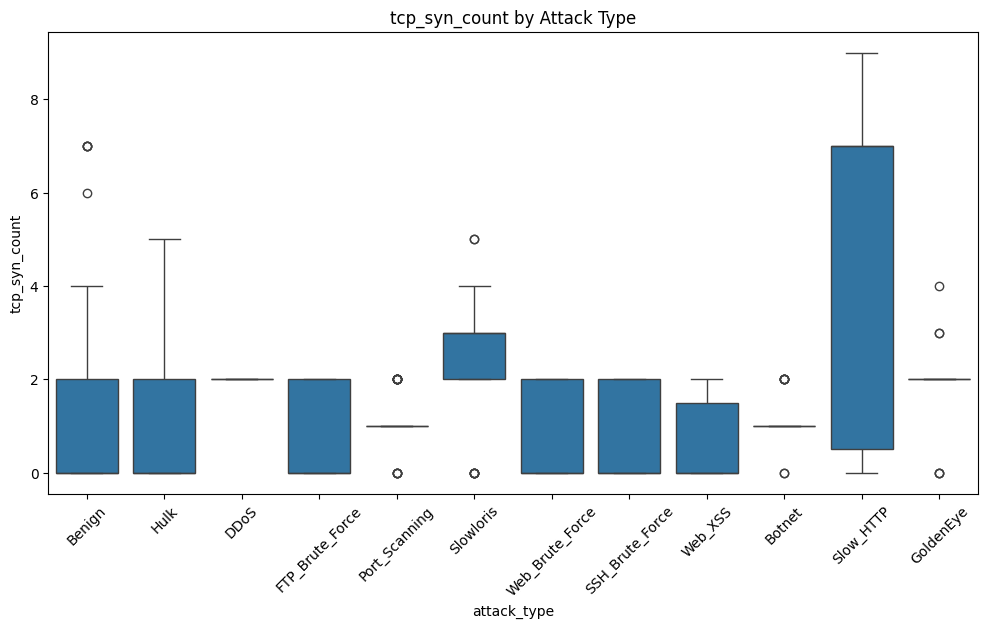

In [241]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='tcp_syn_count', data=train)
plt.xticks(rotation=45)
plt.title("tcp_syn_count by Attack Type")
plt.show()

tcp_psh_count는 그래프로 시각화를 하였을때, 왜도도 높지 않았다. 하지만, 50% 이상이 0으로 이루어져 있고, 최댓값이 1046여서 로그변환을 하는게 좋을 것 같다.

**->tcp_psh_count: 로그변환**

44.45139889259434


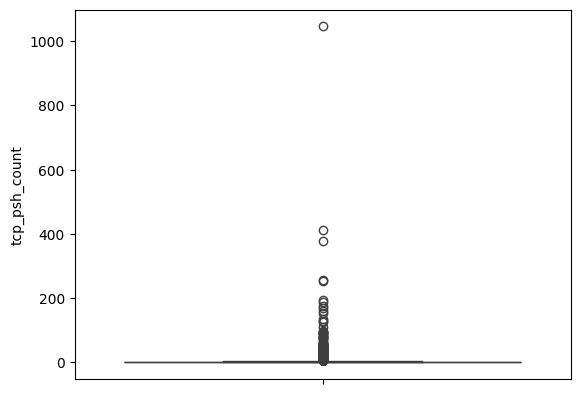

In [242]:
print(train['tcp_psh_count'].skew())
sns.boxplot(train['tcp_psh_count'])
plt.show()

In [243]:
train['tcp_psh_count'].describe()

,tcp_psh_count
count,11999.000000
mean,2.409451
std,13.620653
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,1046.000000


In [244]:
train['tcp_psh_count']=np.log1p(train['tcp_psh_count'])

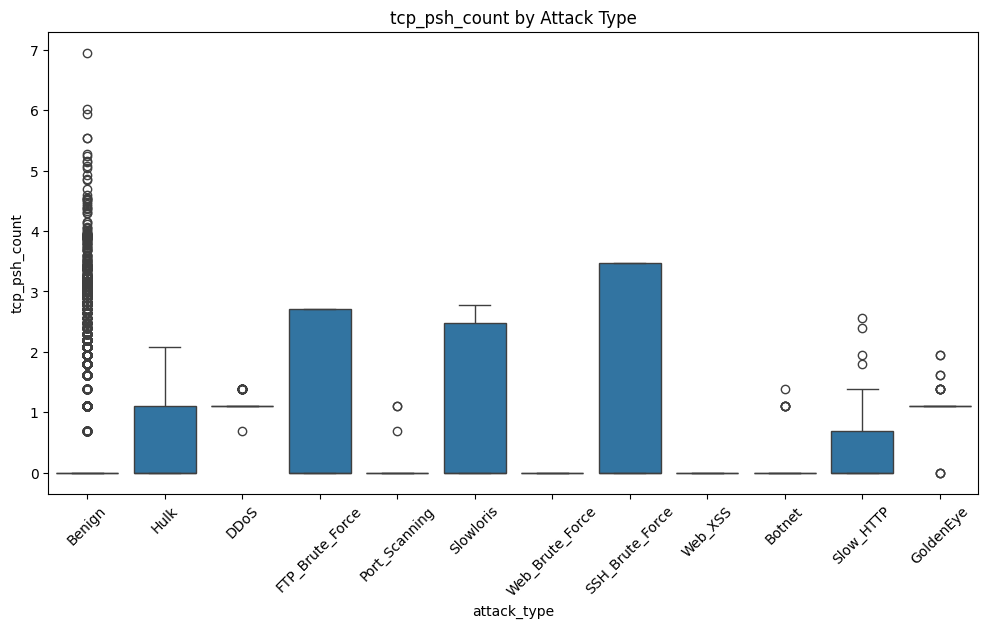

In [245]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='tcp_psh_count', data=train)
plt.xticks(rotation=45)
plt.title("tcp_psh_count by Attack Type")
plt.show()

tcp_rst_count는 0에서 1 사이에 있고, 결측치도 있지 않아서 그대로 사용해도 괜찮을 것 같다.

**-> tcp_rst_count : 그대로 사용**

In [246]:
train['tcp_rst_count'].describe()

,tcp_rst_count
count,11999.000000
mean,0.324027
std,0.468030
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


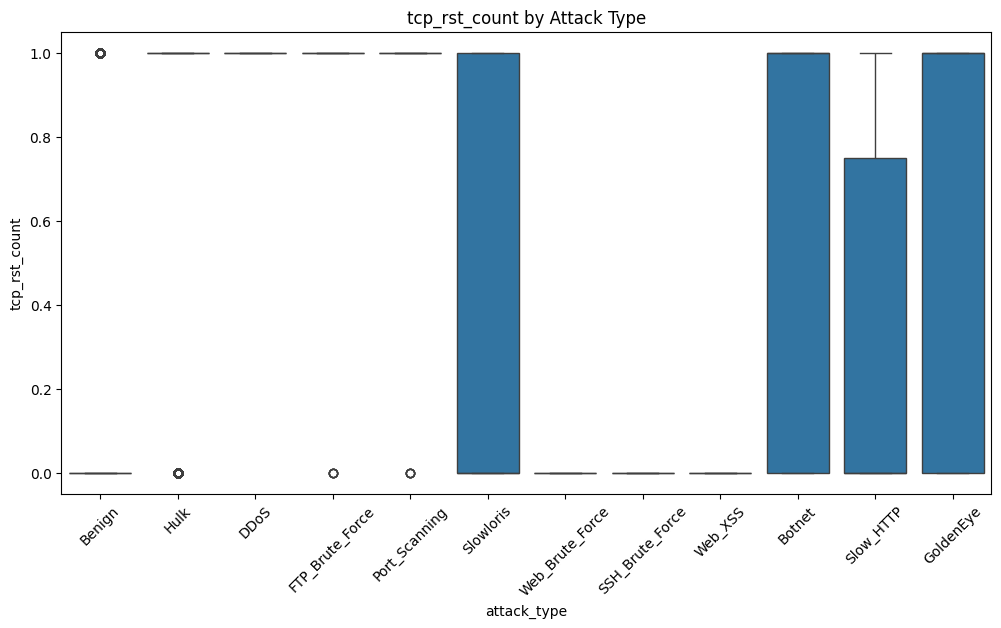

In [247]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='tcp_rst_count', data=train)
plt.xticks(rotation=45)
plt.title("tcp_rst_count by Attack Type")
plt.show()

**->iat_avg_packets : 결측치는 중앙값으로**

In [248]:
print(train['iat_avg_packets'].skew())

1.3008918113839658


In [249]:
train['iat_avg_packets'].describe()

,iat_avg_packets
count,9.239000e+03
mean,3.409358e+08
std,6.284508e+08
min,0.000000e+00
25%,1.738550e-03
50%,4.816914e-02
75%,1.954012e+01
max,1.499458e+09


In [250]:
#iat_avg_packets에서 결측치를 중앙값으로 처리
train['iat_avg_packets'].fillna(train['iat_avg_packets'].median())

,iat_avg_packets
0,4.816914e-02
1,1.499097e+09
2,4.040012e-02
3,9.125718e-02
4,4.816914e-02
...,...
11994,2.363586e-02
11995,6.145215e-02
11996,1.665767e-02
11997,1.594400e-02


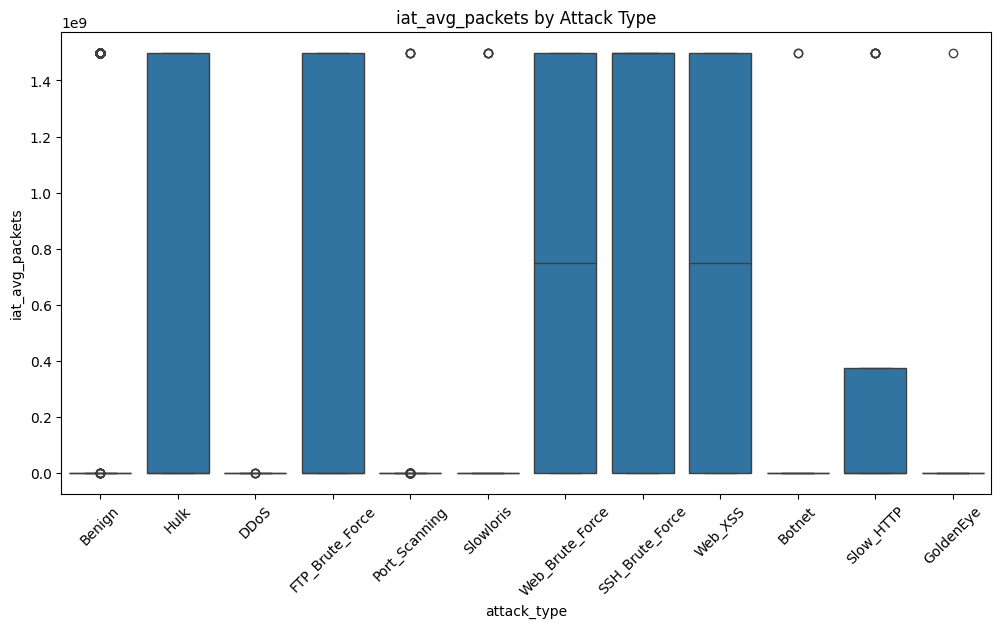

In [251]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='iat_avg_packets', data=train)
plt.xticks(rotation=45)
plt.title("iat_avg_packets by Attack Type")
plt.show()

# 파생 변수 만들기

**1.   is_https**

HTTP(S)는 port_dst가 (80/443)이므로 is_https 파생변수 만들기

In [255]:
train['is_http'] = train['port_dst'].apply(lambda x: 1 if x in [80, 443] else 0)

**2.   is_ssh**

SSH는 port_dst가 22이므로 is_ssh 파생변수 만들기

In [259]:
train['is_ssh'] = train['port_dst'].apply(lambda x: 1 if x in [22] else 0)

**3.   pkt_ratio**

pkt_ratio=pkt_count_fwd / (pkt_count_bwd + 1)인데, 이때 pkt_count_bwd가 0이면 분모가 0이 되므로 이것을 막고자 1을 더했다.

In [265]:
train["pkt_ratio"] = train["pkt_count_fwd"] / (train["pkt_count_bwd"] + 1)

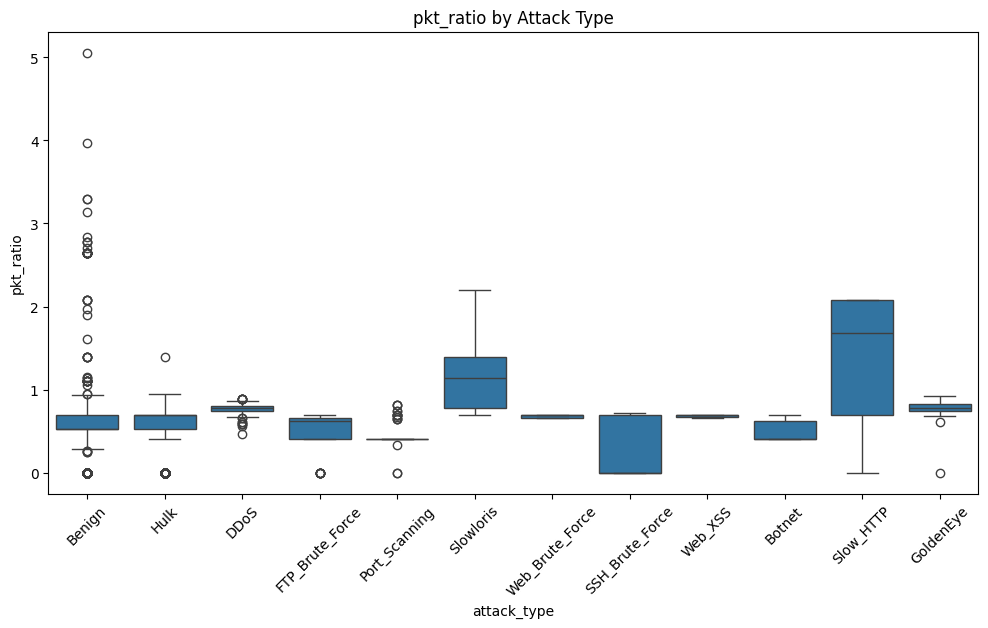

In [266]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_type', y='pkt_ratio', data=train)
plt.xticks(rotation=45)
plt.title("pkt_ratio by Attack Type")
plt.show()

In [269]:
train.select_dtypes(include=['number']).corr()

,port_dst,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,rate_bwd_pkts,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,is_http,is_ssh,pkt_ratio
port_dst,1.000000,-0.181324,-0.432442,-0.141292,-0.123916,0.113484,0.040229,0.033787,-0.161225,-0.161225,-0.207994,0.059731,-0.216712,-0.188657,0.144679,0.211954,-0.057252,-0.008876,-0.606896
duration,-0.181324,1.000000,0.650567,0.620717,-0.372453,-0.408880,-0.024943,-0.076153,0.206967,0.206967,0.383795,0.464973,0.486733,0.579750,-0.128353,-0.269432,0.037143,0.005042,0.344050
pkt_count_fwd,-0.432442,0.650567,1.000000,0.871328,-0.070933,-0.211748,0.016777,-0.041598,0.562983,0.562983,0.635029,0.668143,0.754257,0.874818,-0.132442,-0.466203,0.076575,0.015694,0.655564
pkt_count_bwd,-0.141292,0.620717,0.871328,1.000000,-0.053755,-0.048275,-0.041669,-0.004495,0.551829,0.551829,0.519691,0.744932,0.690767,0.861880,-0.151001,-0.573796,0.047326,0.020288,0.226864
rate_fwd_pkts,-0.123916,-0.372453,-0.070933,-0.053755,1.000000,0.878260,0.110733,0.206951,-0.041662,-0.041662,-0.055609,-0.313505,-0.117994,-0.217390,-0.021194,-0.480967,-0.070791,0.009806,-0.029096
rate_bwd_pkts,0.113484,-0.408880,-0.211748,-0.048275,0.878260,1.000000,0.016607,0.255772,-0.088781,-0.088781,-0.141425,-0.268428,-0.181854,-0.264511,0.052592,-0.510495,-0.077362,0.010028,-0.279730
rate_fwd_bytes,0.040229,-0.024943,0.016777,-0.041669,0.110733,0.016607,1.000000,0.017766,0.070797,0.070797,-0.018285,-0.036194,-0.033956,-0.019445,-0.001510,-0.025481,-0.006533,-0.001022,0.150615
rate_bwd_bytes,0.033787,-0.076153,-0.041598,-0.004495,0.206951,0.255772,0.017766,1.000000,0.053881,0.053881,-0.093703,-0.051451,-0.079743,-0.048575,-0.040305,-0.082015,-0.016223,-0.003241,-0.054394
payload_fwd_mean,-0.161225,0.206967,0.562983,0.551829,-0.041662,-0.088781,0.070797,0.053881,1.000000,1.000000,0.476783,0.609294,0.578415,0.505332,0.169647,-0.319113,0.071619,-0.010948,0.295513
payload_bwd_mean,-0.161225,0.206967,0.562983,0.551829,-0.041662,-0.088781,0.070797,0.053881,1.000000,1.000000,0.476783,0.609294,0.578415,0.505332,0.169647,-0.319113,0.071619,-0.010948,0.295513


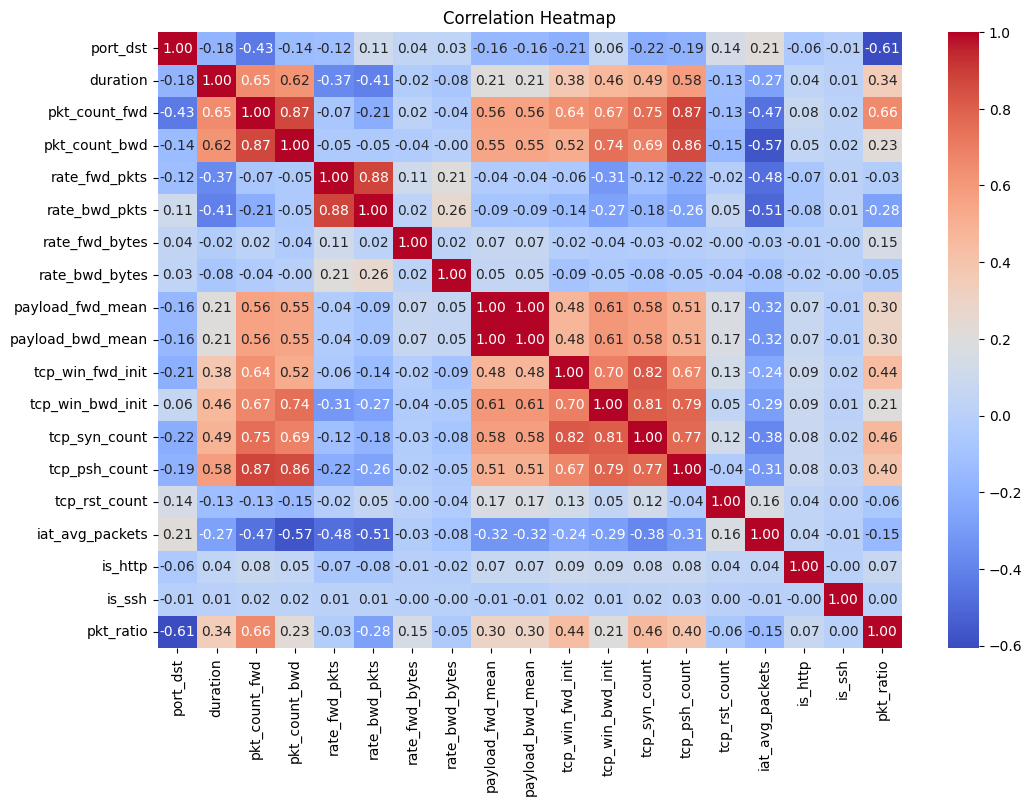

In [271]:
# 숫자형 변수만 추려서 상관계수 행렬 계산
corr = train.select_dtypes(include='number').corr()

# heatmap 시각화
plt.figure(figsize=(12, 8))  # 크기 조절 (선택)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()